In [51]:
!pip install scprep umap-learn magic-impute s_gd2 hdbscan phate

In [52]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import umap

import time

def run_pca(data,n_components=30,random_state =1):
    today= time.ctime()


    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data= pca.fit_transform(data)
    print('process start',today)
    return pca_data


def run_umap(pca_data, n_neighbors=15, n_components=2, metric='euclidean', metric_kwds=None,
             output_metric='euclidean', output_metric_kwds=None, n_epochs=None, learning_rate=1.0,
             init='spectral', min_dist=0.1, spread=1.0, low_memory=True, n_jobs=-1, set_op_mix_ratio=1.0,
             local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0,
             a=None, b=None, random_state=None, angular_rp_forest=False, target_n_neighbors=-1,
             target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42,
             transform_mode='embedding', force_approximation_algorithm=False, verbose=False,
             unique=False, densmap=False, dens_lambda=2.0, dens_frac=0.3, dens_var_shift=0.1,
             output_dens=False, disconnection_distance=None):

    fit = umap.UMAP(n_neighbors, n_components, metric, metric_kwds,
             output_metric, output_metric_kwds, n_epochs, learning_rate,
             init, min_dist, spread, low_memory, n_jobs, set_op_mix_ratio,
             local_connectivity, repulsion_strength, negative_sample_rate, transform_queue_size,
             a, b, random_state, angular_rp_forest, target_n_neighbors,
             target_metric, target_metric_kwds, target_weight, transform_seed,
             transform_mode, force_approximation_algorithm, verbose,
             unique, densmap, dens_lambda, dens_frac, dens_var_shift,
             output_dens, disconnection_distance)
    dim_reduction = fit.fit_transform(pca_data)

    return dim_reduction


def sc_PHENIX(data, umap_data,t=10,decay=15,metric='euclidean',knn=10):



    print('calculando distancias')

    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix

    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))

    knn_dst = np.sort(distance_matrix, axis=1)


    epsilon = knn_dst[:,knn]


    pdx_scale = (distance_matrix / epsilon).T

    E = np.exp(-1 * ( pdx_scale ** decay))

    print(' afinity matrix done')

    A = (E + E.T)

    diff_deg = np.diag(np.sum(A,0))


    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)


    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))

    print('imputation')

    Matix_col_genes_row_cell2 = (data +1) - data

    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2

    Matix_impu = Matix_col_genes_row_cell2 + data_new


    sc_PHENIX = Matix_impu

    print('done')
    end= time.ctime()
    print('done',end)


    return (sc_PHENIX)


def sc_PHENIX_R(data, umap_data, t=10,decay=15,metric='cosine',knn=10):



    print('calculando distancias eucle')

    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix

    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))

    knn_dst = np.sort(distance_matrix, axis=1)


    epsilon = knn_dst[:,knn]


    pdx_scale = (distance_matrix / epsilon).T

    E = np.exp(-1 * ( pdx_scale ** decay))

    print(' afinity matrix done')

    A = (E + E.T)

    diff_deg = np.diag(np.sum(A,0))


    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)


    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))



    rescale_percent =99.99
    M99 = np.percentile(data, rescale_percent, axis=0)
    M100 = data.max(axis=0)
    indices = np.where(M99 == 0)[0]
    M99[indices] = M100[indices]



    M99_new = np.percentile(data_new, rescale_percent, axis=0)
    M100_new = data_new.max(axis=0)
    indices = np.where(M99_new == 0)[0]
    M99_new[indices] = M100_new[indices]


    max_ratio = np.divide(M99, M99_new)
    data_new = np.multiply(data_new, np.tile(max_ratio, (len(data), 1)))



    print('reescalate')


    print('imputation')

    Matix_col_genes_row_cell2 = (data +1) - data

    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2

    Matix_impu = Matix_col_genes_row_cell2 + data_new


    Matix_impu = Matix_impu

    print('done')
    end= time.ctime()
    print('done',end)


    return (Matix_impu)


In [53]:
import pandas as pd
day_clus = pd.read_csv('kmeans_Class_uMAP_6000.csv')
day_clus

,Unnamed: 0,x
0,D6_1,3
1,D6_2,2
2,D6_3,3
3,D6_4,3
4,D6_5,3
...,...,...
358,D19_226,3
359,D19_227,2
360,D19_228,1
361,D19_229,2


In [54]:
raw = pd.read_csv('MCTS_b.csv',sep=';',header=[0],index_col=0).T

In [55]:
raw

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
D6_1,0,0,0,0,0,0,0,8,2,0,...,0,0,0,0,0,0,0,0,0,0
D6_2,0,0,0,0,2,0,0,4,10,0,...,0,0,0,0,0,0,0,0,0,0
D6_3,0,0,0,0,0,0,0,5,7,0,...,0,0,0,0,0,0,0,0,0,0
D6_4,2,0,2,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
D6_5,2,0,0,0,0,0,1,4,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D19_227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D19_228,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
D19_229,0,4,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Library size before normalization'}, xlabel='Library size', ylabel='Number of cells'>

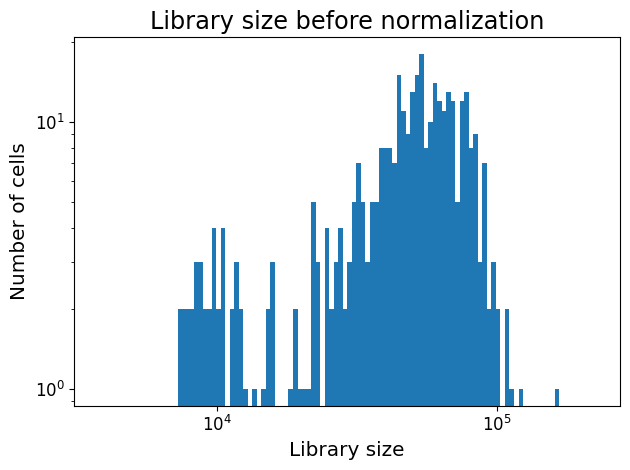

In [56]:
import scprep
scprep.plot.plot_library_size(raw,title='Library size before normalization')

In [57]:
#data normalization
data_norm, library_size = scprep.normalize.library_size_normalize(raw, return_library_size=True)

<Axes: title={'center': 'Gene counts before transformation'}, xlabel='total # of gene counts', ylabel='# of genes'>

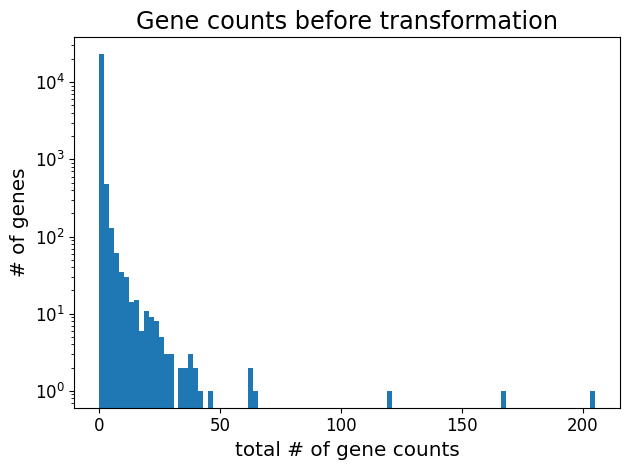

In [58]:
scprep.plot.histogram(data_norm.mean(axis=0), log='y',
                      title="Gene counts before transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

In [59]:
data_sqrt = scprep.transform.sqrt(data_norm)

<Axes: title={'center': 'Gene counts after transformation'}, xlabel='total # of gene counts', ylabel='# of genes'>

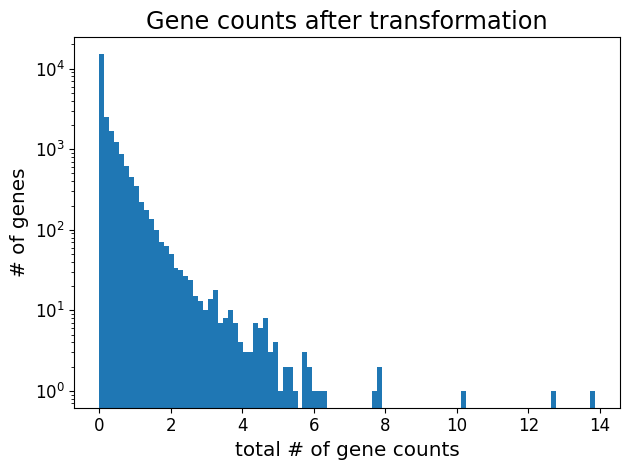

In [60]:
scprep.plot.histogram(data_sqrt.mean(axis=0), log='y',
                      title="Gene counts after transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

<Axes: xlabel='Gene mean', ylabel='Standardized variance'>

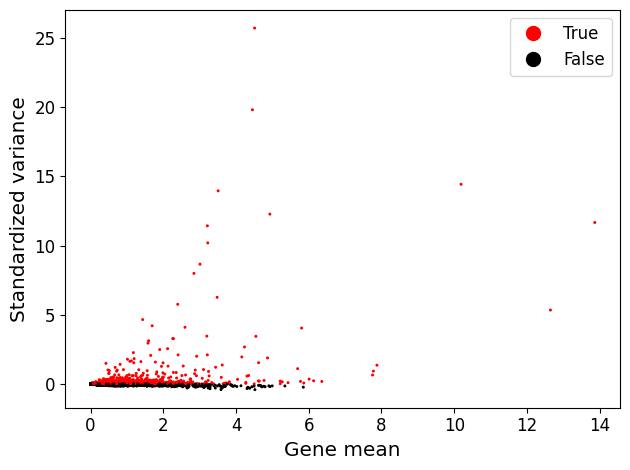

In [61]:
scprep.plot.plot_gene_variability(data_sqrt, percentile=85)

In [62]:
data_hvg = scprep.select.highly_variable_genes(data_sqrt, percentile=85)

In [63]:
dim_reduction = pd.read_csv('/content/Umap_coordinates_clusters.csv')
dim_reduction= dim_reduction
dim_reduction

,Unnamed: 0,V1,V2,k1$cluster
0,D19_1,-1.472687,-4.765218,3
1,D19_10,1.083237,3.160249,1
2,D19_100,0.756240,-1.242957,2
3,D19_101,0.495016,-0.165445,2
4,D19_102,-1.322899,-0.786515,2
...,...,...,...,...
358,D6_95,0.145756,1.044993,2
359,D6_96,-1.465150,2.300778,1
360,D6_97,0.062696,-6.033323,3
361,D6_98,1.471117,0.528763,2


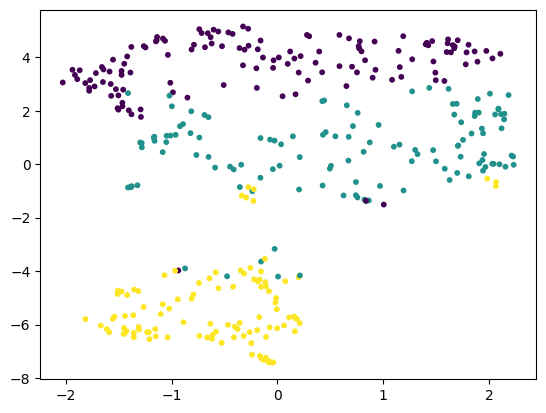

In [64]:
import matplotlib.pyplot as plt

plt.scatter(dim_reduction['V1'], dim_reduction['V2'], c=dim_reduction['k1$cluster'], s=10)
plt.show()

In [65]:
#dim_reduction_umap= dim_reduction[['V1','V2']]
#dim_reduction_umap.shape
dim_reduction

,Unnamed: 0,V1,V2,k1$cluster
0,D19_1,-1.472687,-4.765218,3
1,D19_10,1.083237,3.160249,1
2,D19_100,0.756240,-1.242957,2
3,D19_101,0.495016,-0.165445,2
4,D19_102,-1.322899,-0.786515,2
...,...,...,...,...
358,D6_95,0.145756,1.044993,2
359,D6_96,-1.465150,2.300778,1
360,D6_97,0.062696,-6.033323,3
361,D6_98,1.471117,0.528763,2


In [66]:
data_sqrt

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
D6_1,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.697199,0.348599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_2,0.000000,0.00000,0.000000,0.0,0.405908,0.0,0.000000,0.574040,0.907637,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_3,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.672469,0.795676,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_4,0.426458,0.00000,0.426458,0.0,0.000000,0.0,0.000000,0.000000,1.000132,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_5,0.441683,0.00000,0.000000,0.0,0.000000,0.0,0.312317,0.624634,0.936951,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,1.002913,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_227,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_228,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.583417,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_229,0.000000,2.29961,0.000000,0.0,0.000000,0.0,0.000000,1.991521,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:

data_all = data_sqrt.reset_index()
data_all.rename(columns = {'index':'Unnamed: 0'}, inplace = True)

result_all = pd.merge(data_all,dim_reduction,on='Unnamed: 0')
result_all

,Unnamed: 0,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P,V1,V2,k1$cluster
0,D6_1,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.697199,0.348599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.068019,-4.154163,3
1,D6_2,0.000000,0.00000,0.000000,0.0,0.405908,0.0,0.000000,0.574040,0.907637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430111,1.102717,2
2,D6_3,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.672469,0.795676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.037960,-6.476896,3
3,D6_4,0.426458,0.00000,0.426458,0.0,0.000000,0.0,0.000000,0.000000,1.000132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.612801,-6.390413,3
4,D6_5,0.441683,0.00000,0.000000,0.0,0.000000,0.0,0.312317,0.624634,0.936951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.357999,-6.473364,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,1.002913,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.347560,-3.978606,3
359,D19_227,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624496,-1.168456,2
360,D19_228,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.583417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.867982,3.517514,1
361,D19_229,0.000000,2.29961,0.000000,0.0,0.000000,0.0,0.000000,1.991521,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.386026,-0.861408,2


In [68]:
result_all = result_all.iloc[:,:23923].set_index('Unnamed: 0')

In [69]:
result_all

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
D6_1,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.697199,0.348599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_2,0.000000,0.00000,0.000000,0.0,0.405908,0.0,0.000000,0.574040,0.907637,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_3,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.672469,0.795676,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_4,0.426458,0.00000,0.426458,0.0,0.000000,0.0,0.000000,0.000000,1.000132,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_5,0.441683,0.00000,0.000000,0.0,0.000000,0.0,0.312317,0.624634,0.936951,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,1.002913,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_227,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_228,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.583417,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
data_hvg=data_hvg.reset_index()
data_hvg

,index,A1BG,AAMDC,AARD,AARSD1,AASDH,AASDHPPT,ABAT,ABCA12,ABCA5,...,CTB-58E17.3,CTD-2537I9.13,VWDE,ADGRB1,RP4-569M23.4,IL1B,GBP4,AC106873.4,AQP4-AS1,RP11-535A19.1
0,D6_1,0.00000,0.492994,0.697199,0.348599,0.246497,0.603792,2.351431,0.888757,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
1,D6_2,0.00000,0.000000,0.574040,0.000000,0.000000,0.907637,1.315291,1.111624,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
2,D6_3,0.00000,0.000000,0.795676,0.000000,0.425307,0.601475,1.925658,1.239971,0.300737,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
3,D6_4,0.00000,0.674289,1.044604,0.000000,0.000000,0.674289,1.243327,0.738646,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
4,D6_5,0.00000,0.000000,1.464897,0.000000,0.000000,0.000000,1.530035,0.765017,0.765017,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,D19_226,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.005825,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
360,D19_227,0.00000,0.000000,0.000000,0.000000,0.000000,1.786379,2.526321,1.031366,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
361,D19_228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119645,0.000000,0.000000,...,2.239289,2.239289,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2.239289
362,D19_229,2.29961,0.000000,0.000000,0.000000,2.299610,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.62607,0.0,0.0,0.0,0.0,0.000000


In [71]:
data_hvg.rename(columns = {'index':'Unnamed: 0'}, inplace = True)
data_hvg

,Unnamed: 0,A1BG,AAMDC,AARD,AARSD1,AASDH,AASDHPPT,ABAT,ABCA12,ABCA5,...,CTB-58E17.3,CTD-2537I9.13,VWDE,ADGRB1,RP4-569M23.4,IL1B,GBP4,AC106873.4,AQP4-AS1,RP11-535A19.1
0,D6_1,0.00000,0.492994,0.697199,0.348599,0.246497,0.603792,2.351431,0.888757,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
1,D6_2,0.00000,0.000000,0.574040,0.000000,0.000000,0.907637,1.315291,1.111624,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
2,D6_3,0.00000,0.000000,0.795676,0.000000,0.425307,0.601475,1.925658,1.239971,0.300737,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
3,D6_4,0.00000,0.674289,1.044604,0.000000,0.000000,0.674289,1.243327,0.738646,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
4,D6_5,0.00000,0.000000,1.464897,0.000000,0.000000,0.000000,1.530035,0.765017,0.765017,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,D19_226,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.005825,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
360,D19_227,0.00000,0.000000,0.000000,0.000000,0.000000,1.786379,2.526321,1.031366,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
361,D19_228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119645,0.000000,0.000000,...,2.239289,2.239289,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2.239289
362,D19_229,2.29961,0.000000,0.000000,0.000000,2.299610,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.62607,0.0,0.0,0.0,0.0,0.000000


In [72]:
result = pd.merge(data_hvg,dim_reduction,on='Unnamed: 0')
result

,Unnamed: 0,A1BG,AAMDC,AARD,AARSD1,AASDH,AASDHPPT,ABAT,ABCA12,ABCA5,...,ADGRB1,RP4-569M23.4,IL1B,GBP4,AC106873.4,AQP4-AS1,RP11-535A19.1,V1,V2,k1$cluster
0,D6_1,0.00000,0.492994,0.697199,0.348599,0.246497,0.603792,2.351431,0.888757,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,-1.068019,-4.154163,3
1,D6_2,0.00000,0.000000,0.574040,0.000000,0.000000,0.907637,1.315291,1.111624,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.430111,1.102717,2
2,D6_3,0.00000,0.000000,0.795676,0.000000,0.425307,0.601475,1.925658,1.239971,0.300737,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,-1.037960,-6.476896,3
3,D6_4,0.00000,0.674289,1.044604,0.000000,0.000000,0.674289,1.243327,0.738646,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,-0.612801,-6.390413,3
4,D6_5,0.00000,0.000000,1.464897,0.000000,0.000000,0.000000,1.530035,0.765017,0.765017,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,-1.357999,-6.473364,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.005825,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,-0.347560,-3.978606,3
359,D19_227,0.00000,0.000000,0.000000,0.000000,0.000000,1.786379,2.526321,1.031366,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.624496,-1.168456,2
360,D19_228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119645,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,2.239289,-1.867982,3.517514,1
361,D19_229,2.29961,0.000000,0.000000,0.000000,2.299610,0.000000,0.000000,0.000000,0.000000,...,0.0,1.62607,0.0,0.0,0.0,0.0,0.000000,-1.386026,-0.861408,2


In [73]:
result_all

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
D6_1,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.697199,0.348599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_2,0.000000,0.00000,0.000000,0.0,0.405908,0.0,0.000000,0.574040,0.907637,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_3,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.672469,0.795676,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_4,0.426458,0.00000,0.426458,0.0,0.000000,0.0,0.000000,0.000000,1.000132,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D6_5,0.441683,0.00000,0.000000,0.0,0.000000,0.0,0.312317,0.624634,0.936951,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,1.002913,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_227,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D19_228,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.583417,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
result_data = result.iloc[:,:-3]
result_data

,Unnamed: 0,A1BG,AAMDC,AARD,AARSD1,AASDH,AASDHPPT,ABAT,ABCA12,ABCA5,...,CTB-58E17.3,CTD-2537I9.13,VWDE,ADGRB1,RP4-569M23.4,IL1B,GBP4,AC106873.4,AQP4-AS1,RP11-535A19.1
0,D6_1,0.00000,0.492994,0.697199,0.348599,0.246497,0.603792,2.351431,0.888757,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
1,D6_2,0.00000,0.000000,0.574040,0.000000,0.000000,0.907637,1.315291,1.111624,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
2,D6_3,0.00000,0.000000,0.795676,0.000000,0.425307,0.601475,1.925658,1.239971,0.300737,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
3,D6_4,0.00000,0.674289,1.044604,0.000000,0.000000,0.674289,1.243327,0.738646,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
4,D6_5,0.00000,0.000000,1.464897,0.000000,0.000000,0.000000,1.530035,0.765017,0.765017,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.005825,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
359,D19_227,0.00000,0.000000,0.000000,0.000000,0.000000,1.786379,2.526321,1.031366,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
360,D19_228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119645,0.000000,0.000000,...,2.239289,2.239289,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2.239289
361,D19_229,2.29961,0.000000,0.000000,0.000000,2.299610,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.62607,0.0,0.0,0.0,0.0,0.000000


In [75]:
result_data= result_data.set_index('Unnamed: 0')
result_data

,A1BG,AAMDC,AARD,AARSD1,AASDH,AASDHPPT,ABAT,ABCA12,ABCA5,ABCC1,...,CTB-58E17.3,CTD-2537I9.13,VWDE,ADGRB1,RP4-569M23.4,IL1B,GBP4,AC106873.4,AQP4-AS1,RP11-535A19.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
D6_1,0.00000,0.492994,0.697199,0.348599,0.246497,0.603792,2.351431,0.888757,0.000000,0.348599,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
D6_2,0.00000,0.000000,0.574040,0.000000,0.000000,0.907637,1.315291,1.111624,0.000000,0.703052,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
D6_3,0.00000,0.000000,0.795676,0.000000,0.425307,0.601475,1.925658,1.239971,0.300737,0.300737,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
D6_4,0.00000,0.674289,1.044604,0.000000,0.000000,0.674289,1.243327,0.738646,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
D6_5,0.00000,0.000000,1.464897,0.000000,0.000000,0.000000,1.530035,0.765017,0.765017,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.005825,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
D19_227,0.00000,0.000000,0.000000,0.000000,0.000000,1.786379,2.526321,1.031366,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
D19_228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.119645,0.000000,0.000000,1.119645,...,2.239289,2.239289,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2.239289


In [76]:
umap = result.iloc[:,3590:3592]
umap

,V1,V2
0,-1.068019,-4.154163
1,0.430111,1.102717
2,-1.037960,-6.476896
3,-0.612801,-6.390413
4,-1.357999,-6.473364
...,...,...
358,-0.347560,-3.978606
359,0.624496,-1.168456
360,-1.867982,3.517514
361,-1.386026,-0.861408


In [77]:
#cluster=
cluster= result.iloc[:,3592:]
cluster

,k1$cluster
0,3
1,2
2,3
3,3
4,3
...,...
358,3
359,2
360,1
361,2


In [78]:
day_clus

,Unnamed: 0,x
0,D6_1,3
1,D6_2,2
2,D6_3,3
3,D6_4,3
4,D6_5,3
...,...,...
358,D19_226,3
359,D19_227,2
360,D19_228,1
361,D19_229,2


In [79]:
# Splitting the 'Unnamed: 0' column and expanding into two separate columns
day_clus[['day', 'index']] = day_clus['Unnamed: 0'].str.split('_', expand=True)

# Display the modified DataFrame
print(day_clus)

    Unnamed: 0  x  day index
0         D6_1  3   D6     1
1         D6_2  2   D6     2
2         D6_3  3   D6     3
3         D6_4  3   D6     4
4         D6_5  3   D6     5
..         ... ..  ...   ...
358    D19_226  3  D19   226
359    D19_227  2  D19   227
360    D19_228  1  D19   228
361    D19_229  2  D19   229
362    D19_230  3  D19   230

[363 rows x 4 columns]


In [80]:
day_clus

,Unnamed: 0,x,day,index
0,D6_1,3,D6,1
1,D6_2,2,D6,2
2,D6_3,3,D6,3
3,D6_4,3,D6,4
4,D6_5,3,D6,5
...,...,...,...,...
358,D19_226,3,D19,226
359,D19_227,2,D19,227
360,D19_228,1,D19,228
361,D19_229,2,D19,229


In [81]:
pca = run_pca(result_data, n_components=100,random_state=1)
dim_reduction= pca

process start Tue May 28 01:30:39 2024


In [82]:

"""
import umap
fit = umap.UMAP(n_components=30,metric='euclidean',n_epochs=1000,min_dist=0.5,verbose=1,random_state=1)
dim_reduction = fit.fit_transform(pca)
#raw  data_hvg pca
"""

"\nimport umap\nfit = umap.UMAP(n_components=30,metric='euclidean',n_epochs=1000,min_dist=0.5,verbose=1,random_state=1)\ndim_reduction = fit.fit_transform(pca)\n#raw  data_hvg pca\n"

In [83]:
#result_all
#result_data


In [95]:

#X_magic = sc_PHENIX(result_all, dim_reduction,t=5,decay=1,metric='euclidean',knn=20)

import magic
magic_operator = magic.MAGIC(t=5,decay=5,knn_dist='euclidean',knn=20,n_pca=100)
X_magic = magic_operator.fit_transform(result_all)


Calculating MAGIC...
  Running MAGIC on 363 cells and 23922 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.10/dist-packages/magic/magic.py:425: UserWarning:

Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.



    Calculated PCA in 3.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 3.94 seconds.
  Running MAGIC with `solver='exact'` on 23922-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.43 seconds.
Calculated MAGIC in 4.48 seconds.


Text(0, 0.5, 'VIM')

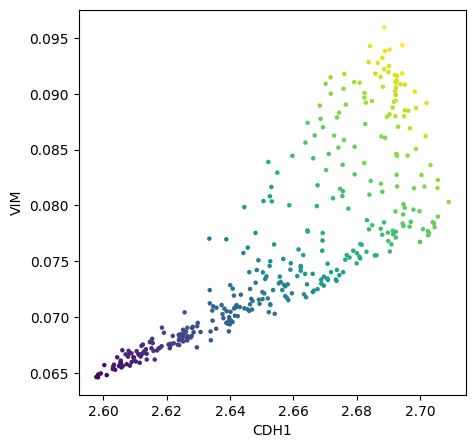

In [96]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X_magic['CDH1'], X_magic['VIM'], c=X_magic['BCL2'], s=5)
plt.xlabel('CDH1')
plt.ylabel('VIM')

In [86]:
dfsadasd

NameError: name 'dfsadasd' is not defined

In [ ]:
X_phenix['HIF1A']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D

Calculating MAGIC...
  Running MAGIC on 363 cells and 23922 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.10/dist-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 3.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 4.10 seconds.
  Running MAGIC with `solver='exact'` on 23922-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.35 seconds.
Calculated MAGIC in 4.58 seconds.
Calculating PHATE...
  Running PHATE on 363 observations and 23922 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 3.01 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 2.19 seconds.
Calculated PHATE in 5.44 seconds.


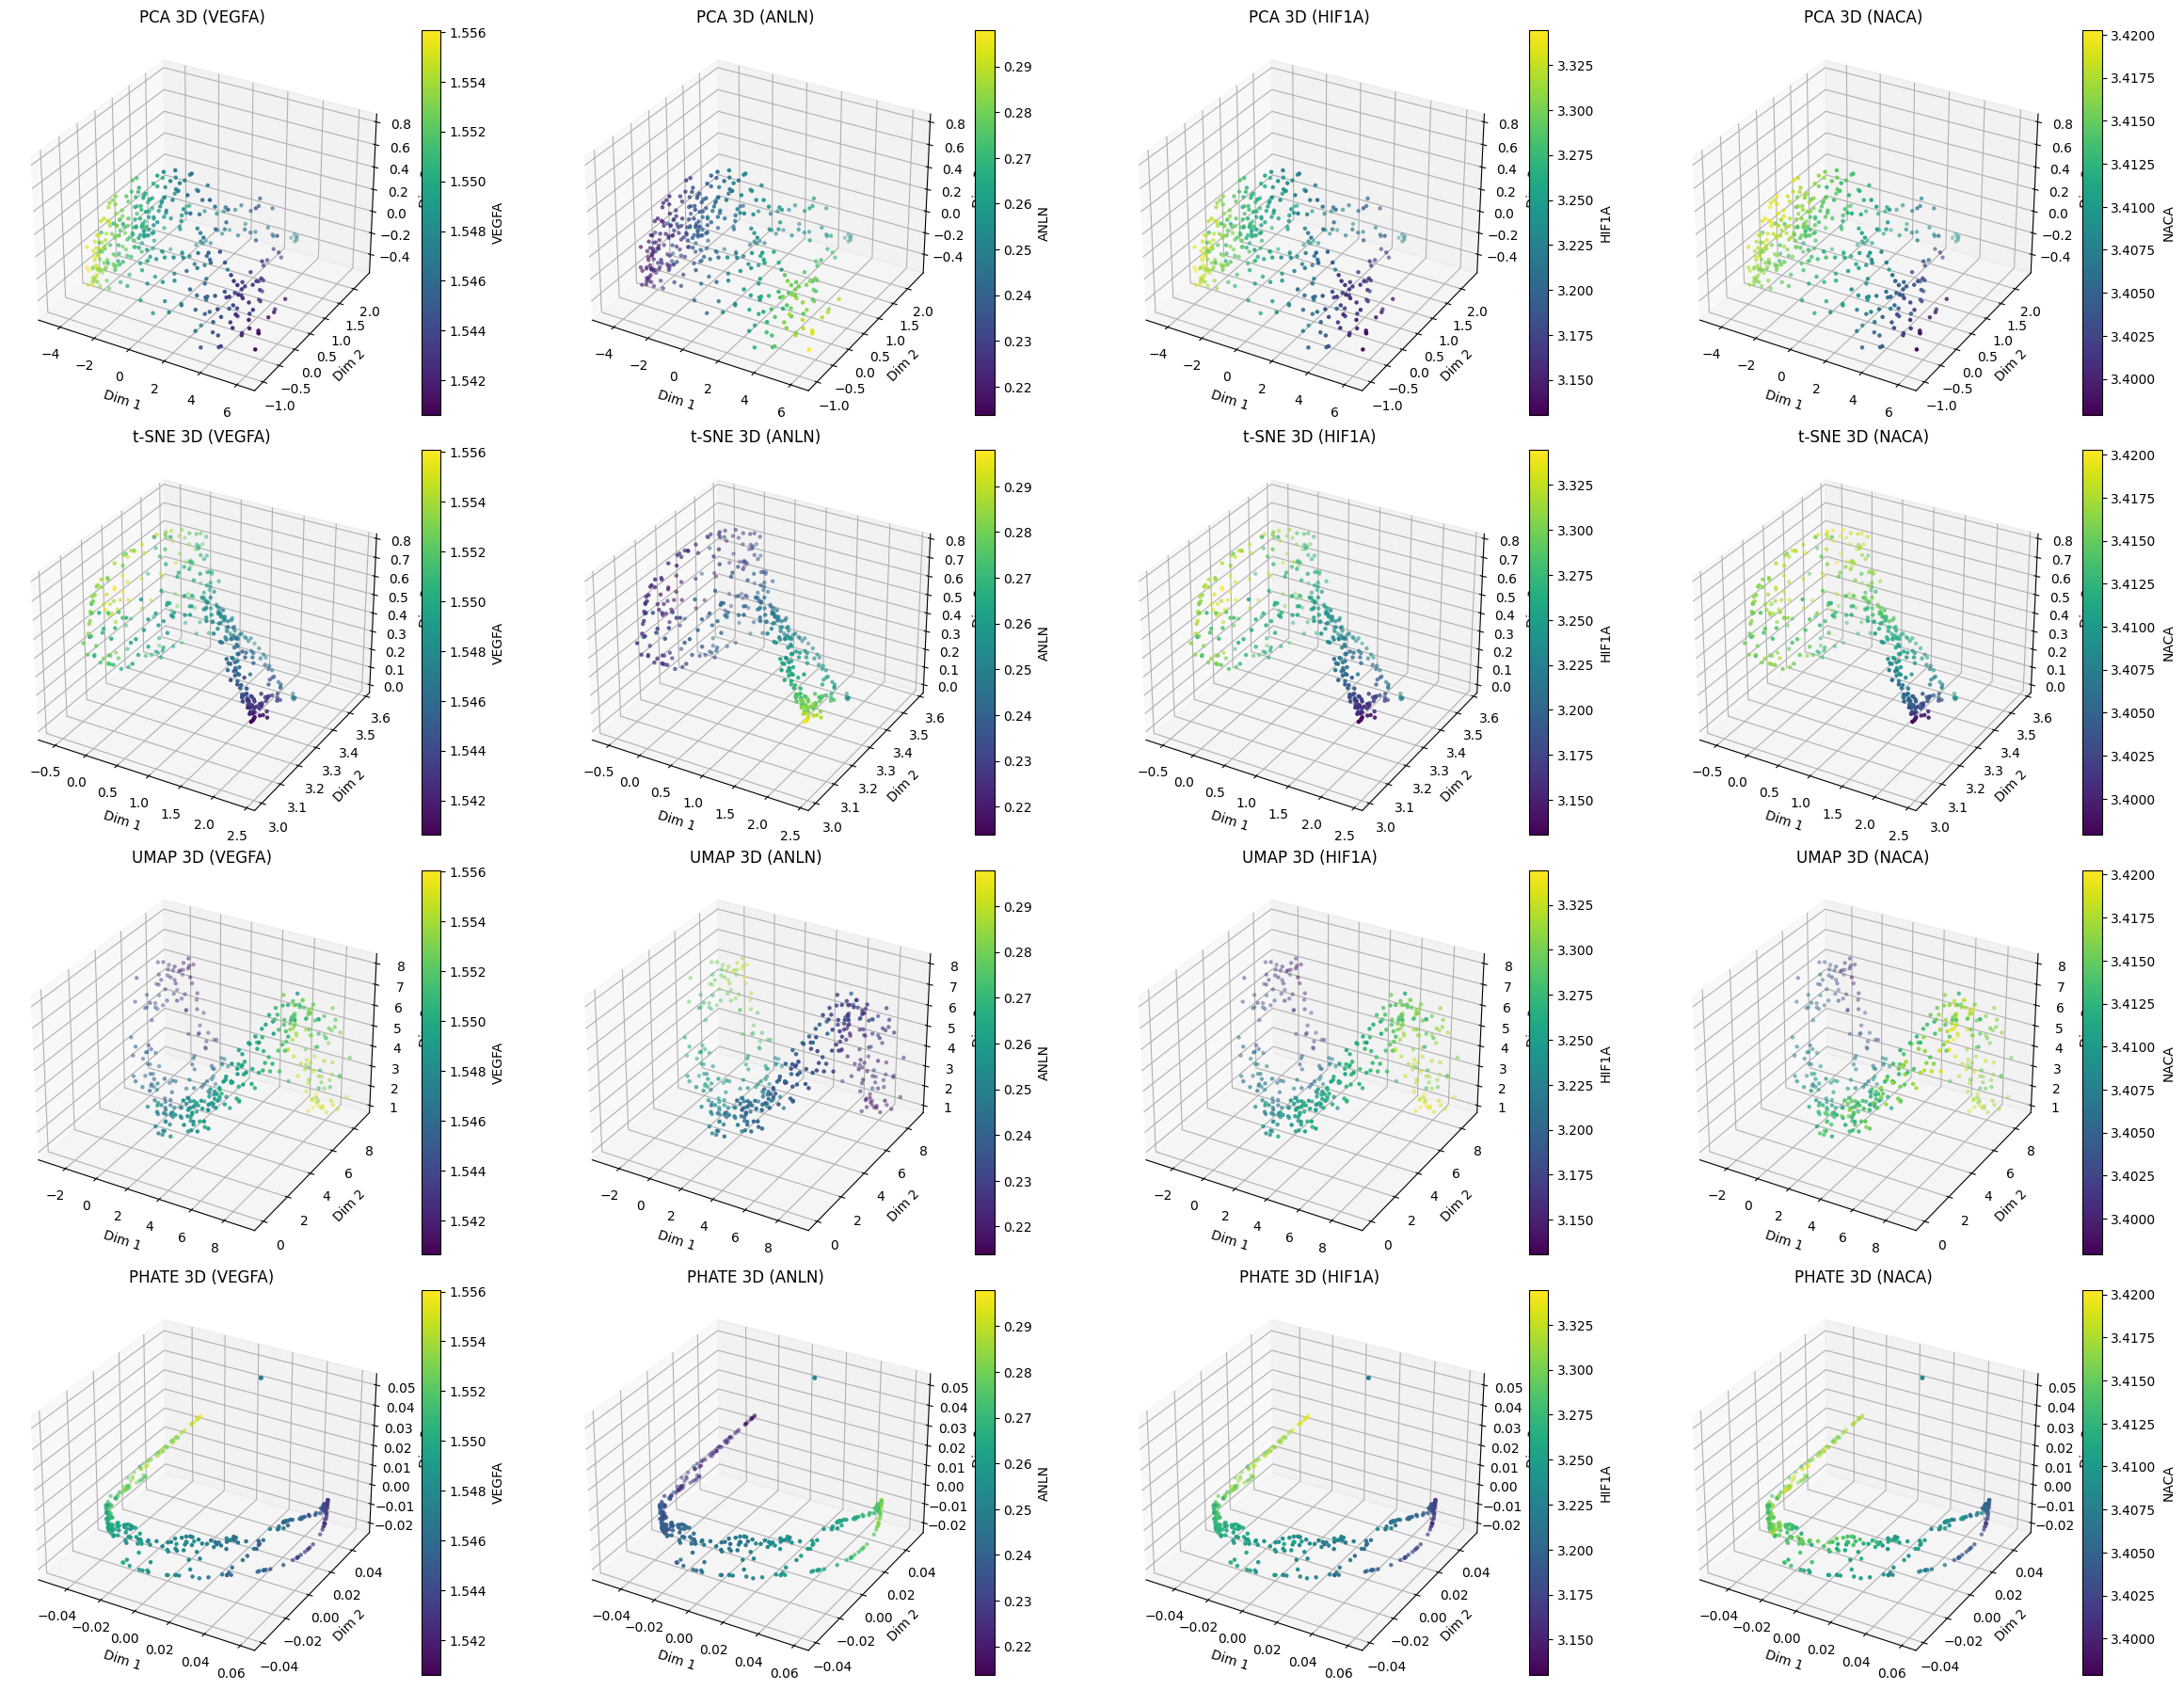

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import phate
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_reductions(result_all, dim_reduction, t, decay, metric, knn):
    # Llamada a sc_PHENIX para preparar los datos con sus parámetros específicos

    magic_operator = magic.MAGIC(t=t,decay=decay,knn_dist=metric,knn=knn, n_pca=100)
    X_magic = magic_operator.fit_transform(result_all)
    #X_phenix = sc_PHENIX(result_all, dim_reduction, t=t, decay=decay, metric='euclidean', knn=knn)

    # Aplicar reducción de dimensionalidad
    X_pca = PCA(n_components=3).fit_transform(X_magic)
    X_tsne = TSNE(n_components=3, perplexity=300).fit_transform(X_magic)
    X_umap = umap.UMAP(n_components=3, n_neighbors=300, min_dist=0.9, n_epochs=20).fit_transform(X_magic)
    X_phate = phate.PHATE(n_components=3).fit_transform(X_magic)

    # Crear figura para visualizaciones en 3D
    fig = plt.figure(figsize=(24, 18))  # Ajustado para acomodar tres filas

    # Lista de genes a visualizar
    genes = ['VEGFA', 'ANLN', 'HIF1A','NACA']

    # Filas de plots para cada técnica de reducción de dimensionalidad
    techniques = [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap), ('PHATE', X_phate)]

    for i, (tech_name, X_red) in enumerate(techniques):
        for j, gene in enumerate(genes):
            ax = fig.add_subplot(4, 4, i * 4 + j + 1, projection='3d')
            sc = ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c=X_phenix[gene], s=5)
            ax.set_title(f'{tech_name} 3D ({gene})')
            ax.set_xlabel('Dim 1')
            ax.set_ylabel('Dim 2')
            ax.set_zlabel('Dim 3')
            fig.colorbar(sc, ax=ax, label=gene)

    plt.tight_layout()
    plt.show()

# Llamada a la función con los parámetros de tu interés
plot_3d_reductions(result_all, dim_reduction, t=5, decay=5, metric='euclidean', knn=20)


In [92]:
!pip install dash-bootstrap-components
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.4 MB/s eta 0:00:00


In [ ]:
pca = run_pca(result_data, n_components=100,random_state=1) #pca parameter
dim_reduction = pca # AS MAGIC
"""
import umap
fit = umap.UMAP(n_components=30,metric='euclidean',n_epochs=1000,min_dist=0.5,verbose=1,random_state=1)
dim_reduction = fit.fit_transform(pca)
"""

In [94]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import phate
clusters = pd.read_csv('/content/3DPCAHDBSCANIMPUTATIONMAGIC.csv', index_col=0)
print(clusters)
def plot_3d_reductions(result_all, dim_reduction, t, decay, metric, knn):
    # Llamada a sc_PHENIX para preparar los datos con sus parámetros específicos
    #X_phenix = sc_PHENIX(result_all, dim_reduction, t=t, decay=decay, metric=metric, knn=knn)
    magic_operator = magic.MAGIC(t=t,decay=decay,knn_dist=metric,knn=knn, n_pca=100)
    X_magic = magic_operator.fit_transform(result_all)

    # Aplicar reducción de dimensionalidad
    X_pca = PCA(n_components=3).fit_transform(X_magic)
    X_tsne = TSNE(n_components=3, perplexity=300).fit_transform(X_magic)
    X_umap = umap.UMAP(n_components=3, n_neighbors=300, min_dist=.8, n_epochs=2000, random_state=10).fit_transform(X_magic)
    X_phate = phate.PHATE(n_components=3).fit_transform(X_magic)

    return X_magic, X_pca, X_tsne, X_umap, X_phate

# Generar las reducciones de dimensionalidad
X_magic, X_pca, X_tsne, X_umap, X_phate = plot_3d_reductions(result_all, dim_reduction, t=5, decay=5, metric='euclidean', knn=20)

# Crear el subplot con cuatro gráficos 3D
fig = make_subplots(
    rows=4, cols=4,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]]*4,
    subplot_titles=(
        "PCA 3D - VEGFA", "t-SNE 3D - VEGFA", "UMAP 3D - VEGFA", "PHATE 3D - VEGFA",
        "PCA 3D - ANLN", "t-SNE 3D - ANLN", "UMAP 3D - ANLN", "PHATE 3D - ANLN",
        "PCA 3D - HIF1A", "t-SNE 3D - HIF1A", "UMAP 3D - HIF1A", "PHATE 3D - HIF1A",
        "PCA 3D - NACA", "t-SNE 3D - NACA", "UMAP 3D - NACA", "PHATE 3D - NACA"
    )
)

genes = ['VEGFA', 'ANLN', 'HIF1A', 'NACA']

for i, gene in enumerate(genes):
    row = i + 1

    # Añadir traza PCA
    fig.add_trace(go.Scatter3d(
        x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
        mode='markers',
        marker=dict(size=5, color=X_magic[gene], colorscale='Inferno', opacity=0.8),
        name=f'PCA - {gene}'
    ), row=row, col=1)

    # Añadir traza t-SNE
    fig.add_trace(go.Scatter3d(
        x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2],
        mode='markers',
        marker=dict(size=5, color=X_magic[gene], colorscale='Inferno', opacity=0.8),
        name=f't-SNE - {gene}'
    ), row=row, col=2)

    # Añadir traza UMAP
    fig.add_trace(go.Scatter3d(
        x=X_umap[:, 0], y=X_umap[:, 1], z=X_umap[:, 2],
        mode='markers',
        marker=dict(size=5, color=X_magic[gene], colorscale='Inferno', opacity=0.8),
        name=f'UMAP - {gene}'
    ), row=row, col=3)

    # Añadir traza PHATE
    fig.add_trace(go.Scatter3d(
        x=X_phate[:, 0], y=X_phate[:, 1], z=X_phate[:, 2],
        mode='markers',
        marker=dict(size=5, color=X_magic[gene], colorscale='Inferno', opacity=0.8),
        name=f'PHATE - {gene}'
    ), row=row, col=4)

# Actualizar el layout
fig.update_layout(
    height=2400, width=2400,
    title_text="3D Dimensionality Reduction Visualization for Multiple Genes MAGIC"
)

# Guardar el gráfico como un archivo HTML
fig.write_html("3d_reduction_dashboard_GENE_exp_MAGIC.html")

print("Dashboard guardado como 3d_reduction_dashboard.html")


     Cluster
0          2
1          4
2          2
3          2
4          2
..       ...
358       -1
359        4
360        4
361        4
362        0

[363 rows x 1 columns]
Calculating MAGIC...
  Running MAGIC on 363 cells and 23922 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.10/dist-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 2.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 3.10 seconds.
  Running MAGIC with `solver='exact'` on 23922-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.44 seconds.
Calculated MAGIC in 3.60 seconds.


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Calculating PHATE...
  Running PHATE on 363 observations and 23922 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 3.24 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 0.07 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 2.13 seconds.
Calculated PHATE in 5.52 seconds.
Dashboard guardado como 3d_reduction_dashboard.html


In [97]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import phate
import plotly.express as px
import magic

# Cargar clusters desde el archivo
clusters = pd.read_csv('/content/3DPCAHDBSCANIMPUTATIONMAGIC.csv', index_col=0)

def plot_3d_reductions(result_all, t, decay, knn,n_pca):
    # Utilizar MAGIC para la imputación con parámetros específicos
    magic_operator = magic.MAGIC(n_pca=n_pca,t=t, decay=decay, knn=knn)
    X_magic = magic_operator.fit_transform(result_all)

    # Aplicar reducción de dimensionalidad
    X_pca = PCA(n_components=3).fit_transform(X_magic)
    X_tsne = TSNE(n_components=3, perplexity=300).fit_transform( X_magic)
    X_umap = umap.UMAP(n_components=3, n_neighbors=300, min_dist=.8, n_epochs=2000, random_state=10).fit_transform(X_magic)
    X_phate = phate.PHATE(n_components=3).fit_transform(X_magic)

    return X_magic, X_pca, X_tsne, X_umap, X_phate

# Suponiendo que tienes los datos de result_all

X_magic, X_pca, X_tsne, X_umap, X_phate = plot_3d_reductions(result_all, t=5, decay=5, knn=20,n_pca=100)

# Asignar colores discretos a los clusters
cluster_labels = clusters.values.flatten()

# Utilizar Plotly Express para obtener la paleta de colores
color_sequence = px.colors.qualitative.Plotly

# Crear un diccionario de colores
unique_clusters = np.unique(cluster_labels)
discrete_colors = {cluster: color_sequence[i % len(color_sequence)] for i, cluster in enumerate(unique_clusters)}
discrete_colors[-1] = 'lightgray'  # Color para el cluster -1

colors = [discrete_colors[cluster] for cluster in cluster_labels]

# Crear el subplot con cuatro gráficos 3D
fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=("PCA 3D - Clusters", "t-SNE 3D - Clusters", "UMAP 3D - Clusters", "PHATE 3D - Clusters")
)

# Añadir clusters como una fila
def add_trace_with_labels(fig, x, y, z, colors, labels, name, row, col):
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers+text',
        marker=dict(size=5, color=colors, opacity=0.8),
        text=labels,
        textposition='top center',
        name=name
    ), row=row, col=col)

add_trace_with_labels(fig, X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], colors, cluster_labels, 'PCA - Clusters', 1, 1)
add_trace_with_labels(fig, X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], colors, cluster_labels, 't-SNE - Clusters', 1, 2)
add_trace_with_labels(fig, X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], colors, cluster_labels, 'UMAP - Clusters', 1, 3)
add_trace_with_labels(fig, X_phate[:, 0], X_phate[:, 1], X_phate[:, 2], colors, cluster_labels, 'PHATE - Clusters', 1, 4)

# Actualizar el layout para todas las escenas
layout_update = dict(
    backgroundcolor='white',
    color='black',
    gridcolor='#E5E5E5'
)

fig.update_layout(
    height=800, width=3000,
    title_text="3D Dimensionality Reduction Visualization for Clusters",
    scene=dict(xaxis=layout_update, yaxis=layout_update, zaxis=layout_update),
    scene2=dict(xaxis=layout_update, yaxis=layout_update, zaxis=layout_update),
    scene3=dict(xaxis=layout_update, yaxis=layout_update, zaxis=layout_update),
    scene4=dict(xaxis=layout_update, yaxis=layout_update, zaxis=layout_update),
    scene_aspectmode='cube',
    scene_camera=dict(
        eye=dict(x=-2.5, y=-1., z=0.2),
    )
)

# Guardar el gráfico como un archivo HTML
fig.write_html("3d_reduction_dashboard_with_clusters.html")

print("Dashboard guardado como 3d_reduction_dashboard_with_clusters.html")


Calculating MAGIC...
  Running MAGIC on 363 cells and 23922 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.10/dist-packages/magic/magic.py:425: UserWarning:

Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.



    Calculated PCA in 2.29 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.42 seconds.
  Running MAGIC with `solver='exact'` on 23922-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.24 seconds.
Calculated MAGIC in 2.72 seconds.


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Calculating PHATE...
  Running PHATE on 363 observations and 23922 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.43 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 3.55 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 0.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



  Calculated metric MDS in 2.08 seconds.
Calculated PHATE in 5.90 seconds.
Dashboard guardado como 3d_reduction_dashboard_with_clusters.html


In [ ]:
,MKLMKMKLMKLMLK